# Reward statistics

We import utils and libraries

In [1]:
import sys
from pathlib import Path

# Modify this as you wish, used for importing custom project packages, such as `utils`
project_path = str(Path.home()) + "\\Projects\\rlgym_demo"

sys.path.insert(0, project_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from utils.analysis import plotting
from utils.analysis.reward_functions import common, extra, custom
from rlgym.utils import common_values

Retrieve arena positions

In [3]:
arena_positions = plotting.arena_positions

## Dummy values generation

We use uniformly generated dummy values for ball positions, linear velocities and player forward vectors.

Those dummy values can be replaced in the future by values detected from replay data of various ranks.

### Grid-like arena positions

In [4]:
def generate_grid_positions(quarter_split=3, height=300):
    xs = np.linspace(common_values.SIDE_WALL_X, 
                     -common_values.SIDE_WALL_X, 
                     2 * quarter_split + 1)
    ys = np.linspace(common_values.BACK_WALL_Y, 
                     -common_values.BACK_WALL_Y, 
                     2 * quarter_split + 1)
    
    mesh_xs, mesh_ys = np.meshgrid(xs, ys)
    positions = np.stack([mesh_xs, mesh_ys], axis=-1).reshape(-1, 2)
    positions = np.hstack([positions, np.ones((positions.shape[0], 1)) * height])
    
    abs_positions = np.abs(positions)
    not_below_corner_condition = (abs_positions[:, 0] + abs_positions[:, 1] < 
                                  common_values.SIDE_WALL_X + common_values.BACK_WALL_Y - 1152)
    return positions[not_below_corner_condition]

In [5]:
ball_positions = generate_grid_positions()

Positions that go beyond the arena corners are clipped

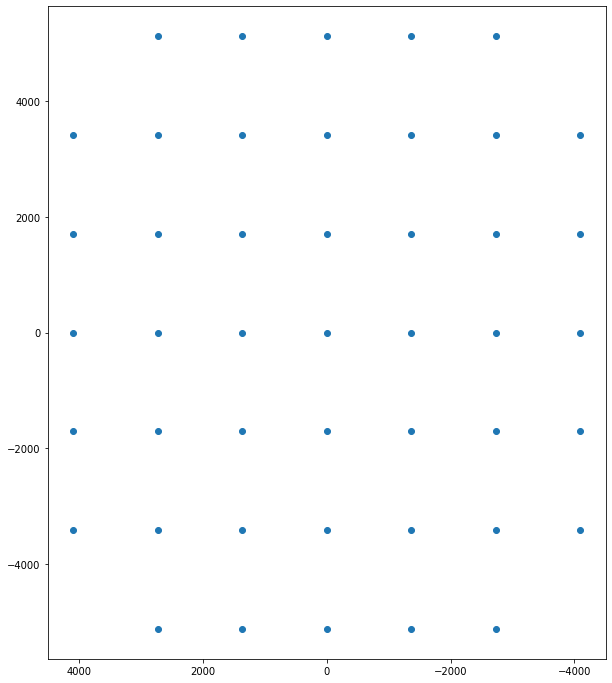

In [6]:
plt.figure(figsize=(10, 12))
plt.scatter(ball_positions[:, 0], ball_positions[:, 1])
plt.gca().invert_xaxis()
plt.show()

### Linear velocities

All-point velocities of 1327.9 produce an L2 norm (velocity vector length \ speed) of 2300. 

2300 is the max player velocity.

In [7]:
player_velocities = np.repeat(np.linspace(1327.9, -1327.9, 100)[None], 3, 1).reshape(-1, 3)

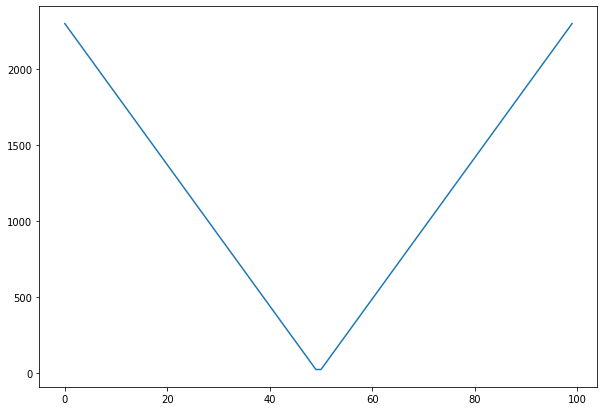

In [8]:
plt.figure(figsize=(10, 7))
plt.plot(np.linalg.norm(player_velocities, axis=1))
plt.show()

Generated player velocities decrease and increase linearly.

The mean is close to the true velocity mean 2300 / 2 = 1150.

In [9]:
np.linalg.norm(player_velocities, axis=1).mean()

1161.6112461468247

### Player forward vectors

Player forward vectors can be thought of as 3-d point representations of a sphere with radius 1

In [10]:
def sphere_points(n_points=200):
    """
    Taken from 
    https://stackoverflow.com/questions/9600801/evenly-distributing-n-points-on-a-sphere
    """
    indices = np.arange(0, n_points, dtype=float) + 0.5
    phi = np.arccos(1 - 2 * indices / n_points)
    theta = np.pi * (1 + 5 ** 0.5) * indices
    x, y, z = np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)
    return np.stack([x, y, z], axis=-1)

In [11]:
forward_vectors = sphere_points()

In [12]:
forward_vectors.round(3)

array([[ 0.036, -0.093,  0.995],
       [-0.155,  0.076,  0.985],
       [ 0.213,  0.062,  0.975],
       [-0.136, -0.224,  0.965],
       [-0.058,  0.291,  0.955],
       [ 0.264, -0.194,  0.945],
       [-0.353, -0.038,  0.935],
       [ 0.251,  0.285,  0.925],
       [ 0.008, -0.403,  0.915],
       [-0.294,  0.308,  0.905],
       [ 0.445, -0.03 ,  0.895],
       [-0.364, -0.291,  0.885],
       [ 0.074,  0.478,  0.875],
       [ 0.278, -0.418,  0.865],
       [-0.504,  0.124,  0.855],
       [ 0.469,  0.256,  0.845],
       [-0.178, -0.521,  0.835],
       [-0.226,  0.518,  0.825],
       [ 0.53 , -0.235,  0.815],
       [-0.562, -0.189,  0.805],
       [ 0.293,  0.531,  0.795],
       [ 0.145, -0.602,  0.785],
       [-0.524,  0.353,  0.775],
       [ 0.637,  0.096,  0.765],
       [-0.412, -0.51 ,  0.755],
       [-0.041,  0.666,  0.745],
       [ 0.488, -0.471,  0.735],
       [-0.689,  0.018,  0.725],
       [ 0.527,  0.459,  0.715],
       [-0.08 , -0.705,  0.705],
       [-0

Vector norms should be equal to 1

In [13]:
np.linalg.norm(forward_vectors, axis=-1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

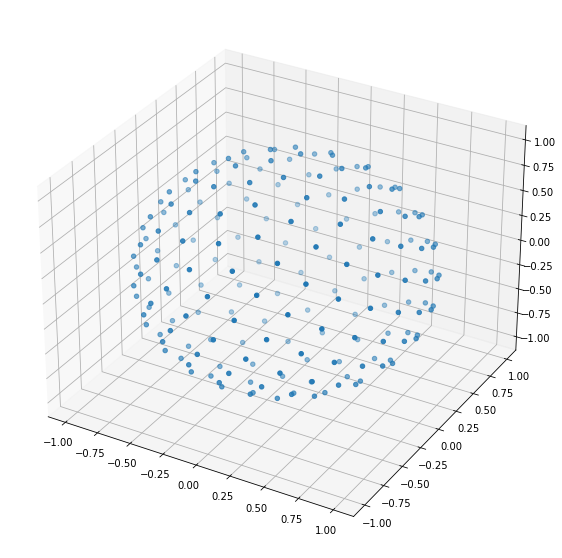

In [14]:
plt.figure(figsize=(10, 10))\
.add_subplot(111, projection="3d")\
.scatter(forward_vectors[:, 0], forward_vectors[:, 1], forward_vectors[:, 2])
plt.show()

## Common

In [7]:
align_ball_zs = [common.align_ball(arena_positions, ball_position) for ball_position in ball_positions]

In [ ]:
ball_y_coord_zs = common.ball_y_coord(arena_positions)

Skip conditionals, constants, events

In [ ]:
angle0 = np.linspace(0, 2 * np.pi, )

In [ ]:
[common.face_ball(arena_positions, ball_position)]

In [ ]:
common.liu_dist_ball2goal(arena_positions)

In [ ]:
[common.liu_dist_player2ball(arena_positions, ball_position)]

In [ ]:
common.save_boost()

In [ ]:
common.touch_ball()

In [ ]:
common.velocity()

In [ ]:
[common.velocity_ball2goal(ball_position, ball_lin_velocity)]

In [ ]:
[common.velocity_player2ball(arena_positions, ball_lin_velocity, ball_position)]

We skip extra rewards

## Custom

In [ ]:
[custom.ball_y_coord(ball_position, exponent)]

In [ ]:
[custom.liu_dist_player2ball(arena_positions, ball_position, dispersion, density)]

In [ ]:
custom.signed_liu_dist_ball2goal(arena_positions, dispersion, density)

## Additional

`common.liu_dist_ball2goal` orange minus blue goal distance difference, Necto style. Is signed Liu distance really useful?

Thoughts: 
- Touch ball with acceleration (toward goal)?
- Reward ball goal speed? Can I do with ball to goal velocity?
- Opponent punish weight in distributed team spirit reward?
- What is a good potential function?
- How much does dribbling reward? (semi-continuous ball reward, ball z=150)